In [36]:
# Import dependencies
import math
import numpy as np
import pandas as pd
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt


# initial derivative parameters
S = 69.85          #stock price
K = 61            #strike price
vol = 0.77        #volatility (%)
r = 0.0408           #risk-free rate (%)
N = 10              #number of time steps
M = 1000            #number of simulations

market_value = 9.40 #market price of option
T = ((datetime.date(2025,7,25)-datetime.date(2025,7,20)).days+1)/365    #time in years
print(T)
0.1643835616438356

#Monte Carlo - Step by Step
# Precompute constants
dt = T/N
nudt = (r - 0.5*vol**2)*dt
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

# Standard Error Placeholders
sum_CT = 0
sum_CT2 = 0

# Monte Carlo Method
for i in range(M):
    lnSt = lnS
    for j in range(N):
        lnSt = lnSt + nudt + volsdt*np.random.normal()

    ST = np.exp(lnSt)
    CT = max(0, ST - K)
    sum_CT = sum_CT + CT #sum of payoffs to calculate the average payoff
    sum_CT2 = sum_CT2 + CT*CT #sum of squared payoffs to calculate the variance

# Compute Expectation and SE
C0 = sum_CT/M*(np.exp(-r*T)) #c0 = (average * exp(-r*t))
sigma = np.sqrt( (sum_CT2 - sum_CT*sum_CT/M)*np.exp(-2*r*T) / (M-1) )
SE = sigma/np.sqrt(M)

print("Call value is ${0} with SE +/- {1}".format(np.round(C0,2),np.round(SE,2)))


0.01643835616438356
Call value is $9.07 with SE +/- 0.21


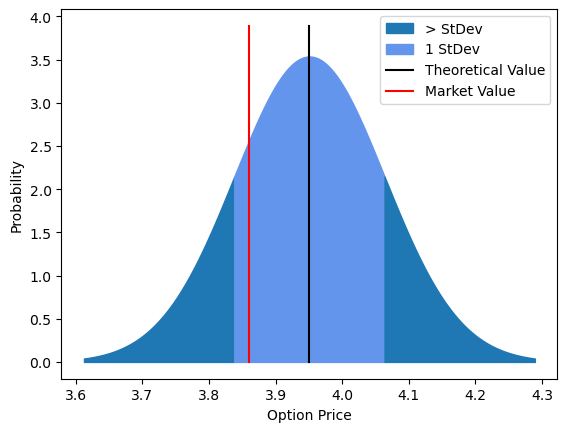

In [10]:
#Visualization of Convergence
x1 = np.linspace(C0-3*SE, C0-1*SE, 100)
x2 = np.linspace(C0-1*SE, C0+1*SE, 100)
x3 = np.linspace(C0+1*SE, C0+3*SE, 100)

s1 = stats.norm.pdf(x1, C0, SE)
s2 = stats.norm.pdf(x2, C0, SE)
s3 = stats.norm.pdf(x3, C0, SE)

plt.fill_between(x1, s1, color='tab:blue',label='> StDev')
plt.fill_between(x2, s2, color='cornflowerblue',label='1 StDev')
plt.fill_between(x3, s3, color='tab:blue')

plt.plot([C0,C0],[0, max(s2)*1.1], 'k',
        label='Theoretical Value')
plt.plot([market_value,market_value],[0, max(s2)*1.1], 'r',
        label='Market Value')

plt.ylabel("Probability")
plt.xlabel("Option Price")
plt.legend()
plt.show()

In [26]:
!pip install yfinance
import yfinance as yf
import numpy as np
import datetime
ticker = yf.Ticker("KO")
exp_dates = ticker.options              # List of available expirations :contentReference[oaicite:2]{index=2}
print("Expirations:", exp_dates)

expiry = exp_dates[0]                  # e.g. earliest expiry
chain = ticker.option_chain(expiry)
calls = chain.calls                    # DataFrame of call options :contentReference[oaicite:3]{index=3}

print(calls[['strike', 'lastPrice', 'impliedVolatility']].head())


Expirations: ('2025-07-25', '2025-08-01', '2025-08-08', '2025-08-15', '2025-08-22', '2025-08-29', '2025-09-19', '2025-10-17', '2025-11-21', '2026-01-16', '2026-02-20', '2026-03-20', '2026-06-18', '2026-09-18', '2026-12-18', '2027-01-15')
   strike  lastPrice  impliedVolatility
0    55.0      14.40           1.952149
1    58.0      11.40           1.570315
2    61.0       8.87           0.773440
3    62.0       7.85           1.069341
4    63.0       7.00           1.101567


In [6]:
git remote add origin https://github.com/saiyedlapalli/OptionPricing.git
git branch -M main
git push -u origin main

SyntaxError: invalid syntax (1304832654.py, line 1)